In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [ ]:
def pad(img,k):
  for i in range(k):
      img=np.insert(img,img.shape[1],np.zeros((img.shape[0],1)).reshape((img.shape[0],)),axis=1)
  return img

#Unconstrained Using Squared Loss

In [ ]:
def udisp_map_sq_loss(right_img,left_img,window) :
  img1=cv2.imread(right_img,cv2.IMREAD_GRAYSCALE)
  img2=cv2.imread(left_img,cv2.IMREAD_GRAYSCALE)
  r,c=img1.shape
  u=np.zeros((r,c))
  for i in range(0,r-window,window):
    for j in range(0,c-window,window):
      loss=((img1[i:i+window,j:j+window]-img2[i:i+window,j:j+window])**2).mean()
      u[i-window,j-window//2]=0
      loss=loss
      for k in range(j,c-window,window):
        loss1=((img1[i:i+window,j:j+window]-img2[i:i+window,k:k+window])**2).mean()
        if(loss1<loss):
            loss=loss1
            u[i:i+window,j:j+window]=k-j
  plt.imshow(u,cmap='gray')

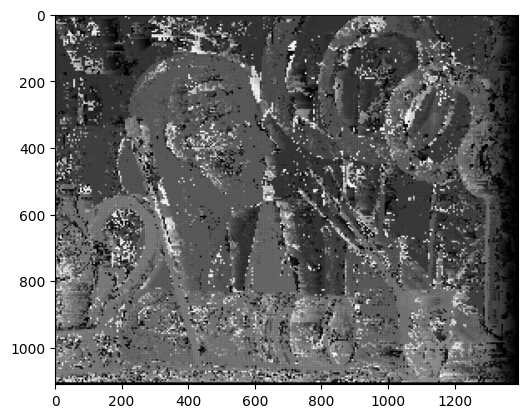

In [ ]:
udisp_map_sq_loss('view2.png','view0.png',5)

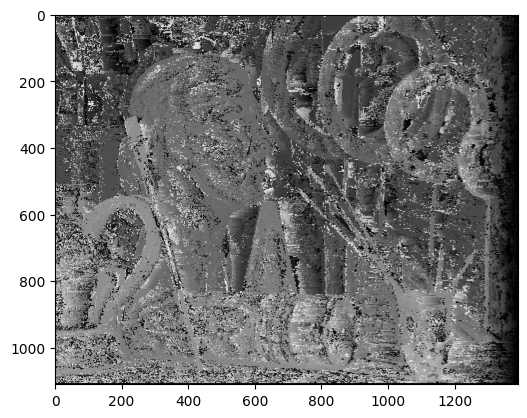

In [ ]:
disp_map_sq_loss('view2.png','view0.png',3,150)

#Using Squared Loss

In [ ]:
def disp_map_sq_loss(right_img,left_img,window,max_disparity) :
  img1=cv2.imread(right_img,cv2.IMREAD_GRAYSCALE)
  img2=cv2.imread(left_img,cv2.IMREAD_GRAYSCALE)
  disparity=max_disparity
  r,c=img1.shape
  u=np.zeros((r,c))
  img2=pad(img2,disparity)
  for i in range(0,r-window,window):
    for j in range(0,c-window,window):
      loss=((img1[i:i+window,j:j+window]-img2[i:i+window,j:j+window])**2).mean()
      u[i-window,j-window//2]=0
      for k in range(j,j+disparity,window):
        loss1=((img1[i:i+window,j:j+window]-img2[i:i+window,k:k+window])**2).mean()
        if(loss1<loss):
            loss=loss1
            u[i:i+window,j:j+window]=k-j
  plt.imshow(u,cmap='gray')

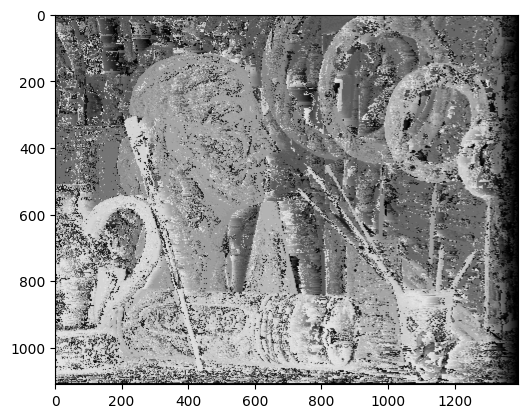

In [ ]:
disp_map_sq_loss('view2.png','view0.png',3,100)

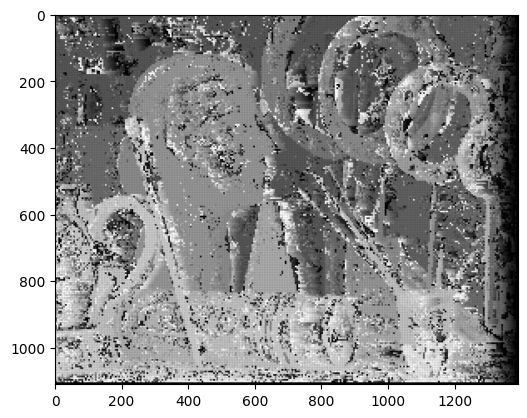

In [ ]:
disp_map_sq_loss('view2.png','view0.png',5,125)

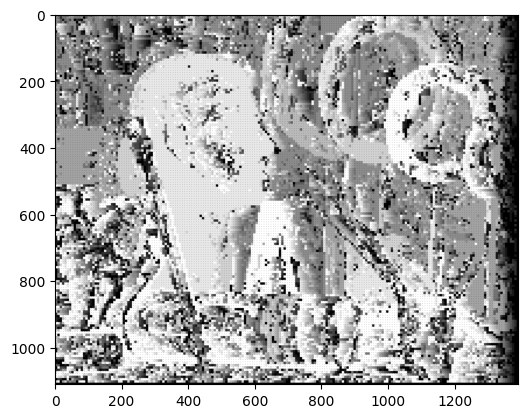

In [ ]:
disp_map_sq_loss('view2.png','view0.png',7,100)

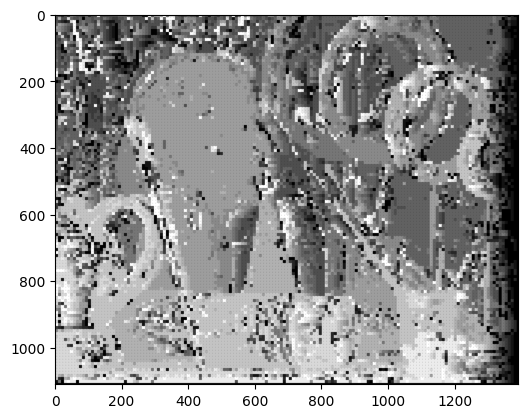

In [ ]:
disp_map_sq_loss('view2.png','view0.png',9,125)

#Disparity Map using Cross Correlation loss

In [ ]:
def cc(a,b):
  epsilon = 1e-6
  u1=a.mean()
  u2=b.mean()
  w1=a-u1
  w2=b-u2
  loss=(w1*w2).sum()/((((w1**2).sum())**0.5)*(((w2**2).sum())**0.5)+epsilon)
  return (1-loss)

In [ ]:
def disp_map_cc_loss(right_img,left_img,window,max_disparity) :
  img1=cv2.imread(right_img,cv2.IMREAD_GRAYSCALE)
  img2=cv2.imread(left_img,cv2.IMREAD_GRAYSCALE)
  disparity=max_disparity
  r,c=img1.shape
  u=np.zeros((r,c))
  img2=pad(img2,disparity)
  for i in range(0,r-window,window):
    for j in range(0,c-window,window):
      loss=cc(img1[i:i+window,j:j+window],img2[i:i+window,j:j+window])
      u[i-window,j-window//2]=0
      for k in range(j,j+disparity,window):
        loss1=cc(img1[i:i+window,j:j+window],img2[i:i+window,k:k+window])
        if(loss1<loss):
            loss=loss1
            u[i:i+window,j:j+window]=k-j
  plt.imshow(u,cmap='gray')
  return u

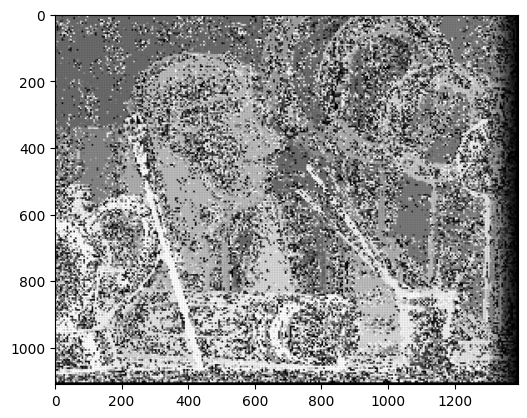

In [ ]:
u=disp_map_cc_loss('view2.png','view0.png',5,100)

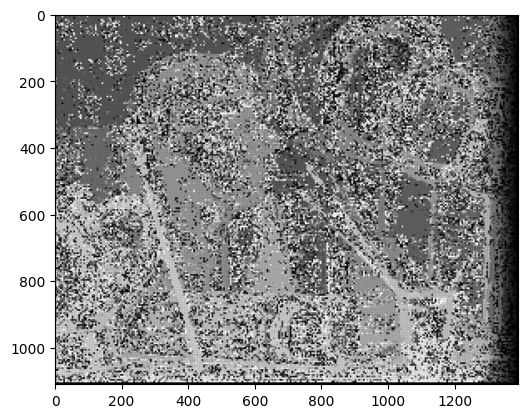

In [ ]:
disp_map_cc_loss('view2.png','view0.png',5,125)

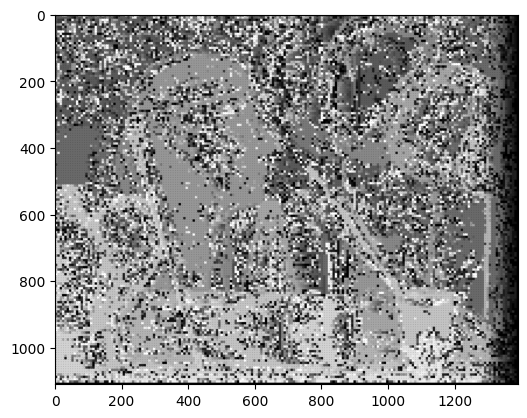

In [ ]:
disp_map_cc_loss('view2.png','view0.png',7,125)

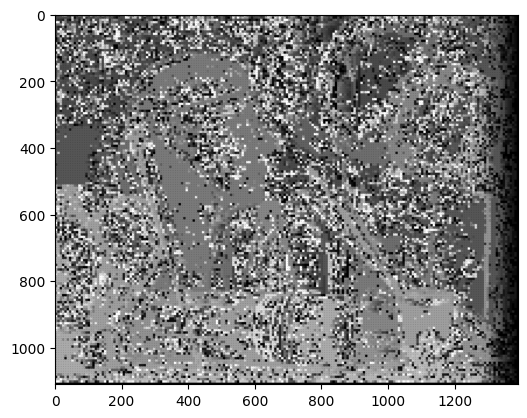

In [ ]:
disp_map_cc_loss('view2.png','view0.png',7,150)

#Disparity Map using CT loss

In [ ]:
def ct1(a):
  r,c=a.shape
  t1=a[r//2,c//2]
  a[a<t1]=0
  a[a>t1]=1
  m=a[0,0]+2*a[0,1]+ 4*a[0,2]+8*a[1,0]+16*a[1,2]+32*a[2,0]+64*a[2,1]+128*a[0,1]
  return m

In [ ]:
def ct(a,b):
  r,c=a.shape
  t1=a[r//2,c//2]
  a[a<t1]=0
  a[a>t1]=1
  t1=b[r//2,c//2]
  b[b<t1]=0
  b[b>t1]=1
  c=((a!=b).sum())
  return c

In [ ]:
def disp_map_ct_loss1(right_img,left_img,window,max_disparity) :
  img_1=cv2.imread(right_img,cv2.IMREAD_GRAYSCALE)
  img_2=cv2.imread(left_img,cv2.IMREAD_GRAYSCALE)
  disparity=max_disparity
  r,c=img_1.shape
  u=np.zeros((r,c))
  img1=np.zeros(img_1.shape)
  img2=np.zeros(img_2.shape)
  for i in range(0+window//2,r-window//2):
    for j in range(0+window//2,c-window//2):
      img1[i,j]=ct1(img_1[i-window//2:i+window//2+1,j-window//2:j+window//2+1])
      img2[i,j]=ct1(img_2[i-window//2:i+window//2+1,j-window//2:j+window//2+1])
  img2=pad(img2,disparity)
  for i in range(0,r-window,window):
    for j in range(0,c-window,window):
      loss=((img1[i:i+window,j:j+window]-img2[i:i+window,j:j+window])**2).mean()
      u[i-window,j-window//2]=0
      for k in range(j,j+disparity,window):
        loss1=((img1[i:i+window,j:j+window]-img2[i:i+window,k:k+window])**2).mean()
        if(loss1<loss):
            loss=loss1
            u[i:i+window,j:j+window]=k-j
  plt.imshow(u,cmap='gray')

In [ ]:
def disp_map_ct_loss(right_img,left_img,window,max_disparity) :
  img1=cv2.imread(right_img,cv2.IMREAD_GRAYSCALE)
  img2=cv2.imread(left_img,cv2.IMREAD_GRAYSCALE)
  disparity=max_disparity
  r,c=img1.shape
  u=np.zeros((r,c))
  img2=pad(img2,disparity)
  m=0
  for i in range(0,r-window,window):
    for j in range(0,c-window,window):
      loss=ct(img1[i:i+window,j:j+window],img2[i:i+window,j:j+window])
      u[i-window,j-window//2]=0
      for k in range(j,j+disparity,window):
        loss1=ct(img1[i:i+window,j:j+window],img2[i:i+window,k:k+window])
        if(loss1<=loss):
            loss=loss1
            u[i:i+window,j:j+window]=k-j
  plt.imshow(u,cmap='gray')

In [ ]:
def census_transform(image, window_size):
    height, width = image.shape
    half_window = window_size // 2
    census = np.zeros_like(image, dtype=np.uint8)

    for y in range(half_window, height - half_window):
        for x in range(half_window, width - half_window):
            center = image[y, x]
            descriptor = 0

            for j in range(-half_window, half_window + 1):
                for i in range(-half_window, half_window + 1):
                    if i == 0 and j == 0:
                        continue
                    descriptor <<= 1
                    if image[y + j, x + i] >= center:
                        descriptor |= 1

            census[y, x] = descriptor
    return census

In [ ]:
disp_map_ct_loss1('view2.png','view0.png',5,125)

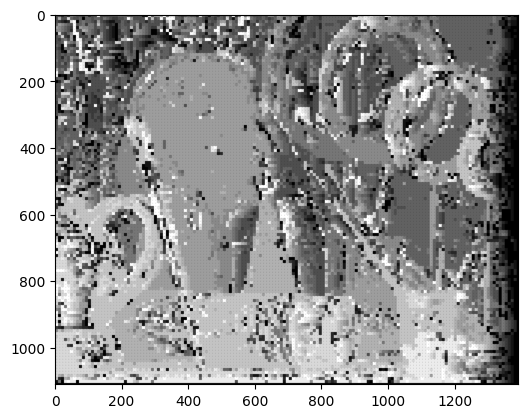

In [ ]:
disp_map_ct_loss('view2.png','view0.png',9,125)